# [Notice]
- 문제는 해당 파일과 함께 첨부한 '복습문항.pdf' 파일을 참고해주세요.
- 코드 외의 답안은 해당 파일에 마크다운 형식으로 답하셔도 되고, 종이/테블릿 등 수기로 작성 및 제출하셔도 무방합니다.

## [문항1]

In [58]:
from sklearn.datasets import load_iris
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import multivariate_normal

iris = load_iris() 
x = iris.data.T
D, N = x.shape

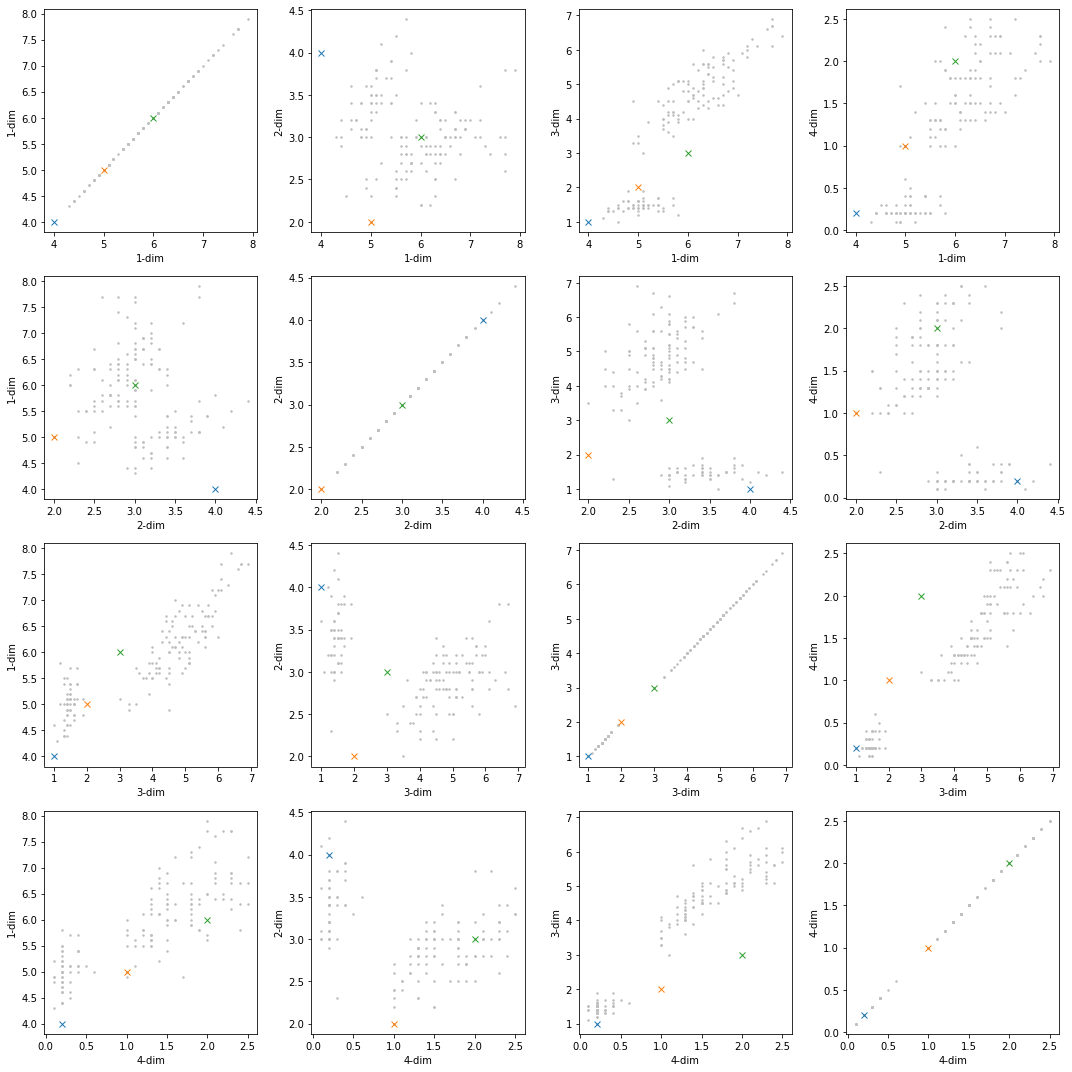

In [59]:
# Figure2 iris 데이터와 mu의 초기 위치 시각화 

# initialize
K = 3
maxIter = 10
mu0 = np.array([[4.0, 5.0, 6.0],
                [4.0, 2.0, 3.0],
                [1.0, 2.0, 3.0],
                [0.2, 1.0, 2.0]])

muTrail = np.empty((D,K,maxIter))
muTrail[:] = np.nan
muTrail[:,:,0] = mu0
# print(muTrail)

dist2 = np.zeros((N,K)) 

plt.figure(figsize = (15,15))
for i in range(0,D):
    for j in range(0,D):
        plt.subplot(D,D,i*D + j + 1)
        plt.plot(x[i,:],x[j,:],".",markersize = 3,color = [0.75,0.75,0.75]) 
        
        for k in range(0,K):
            plt.plot(muTrail[i,k,:],muTrail[j,k,:],'C%dx--'%k)
            
        plt.xlabel('%d-dim'%(i+1))
        plt.ylabel('%d-dim'%(j+1))
        plt.tight_layout()
        
# plt.savefig('iris.png')
plt.show()

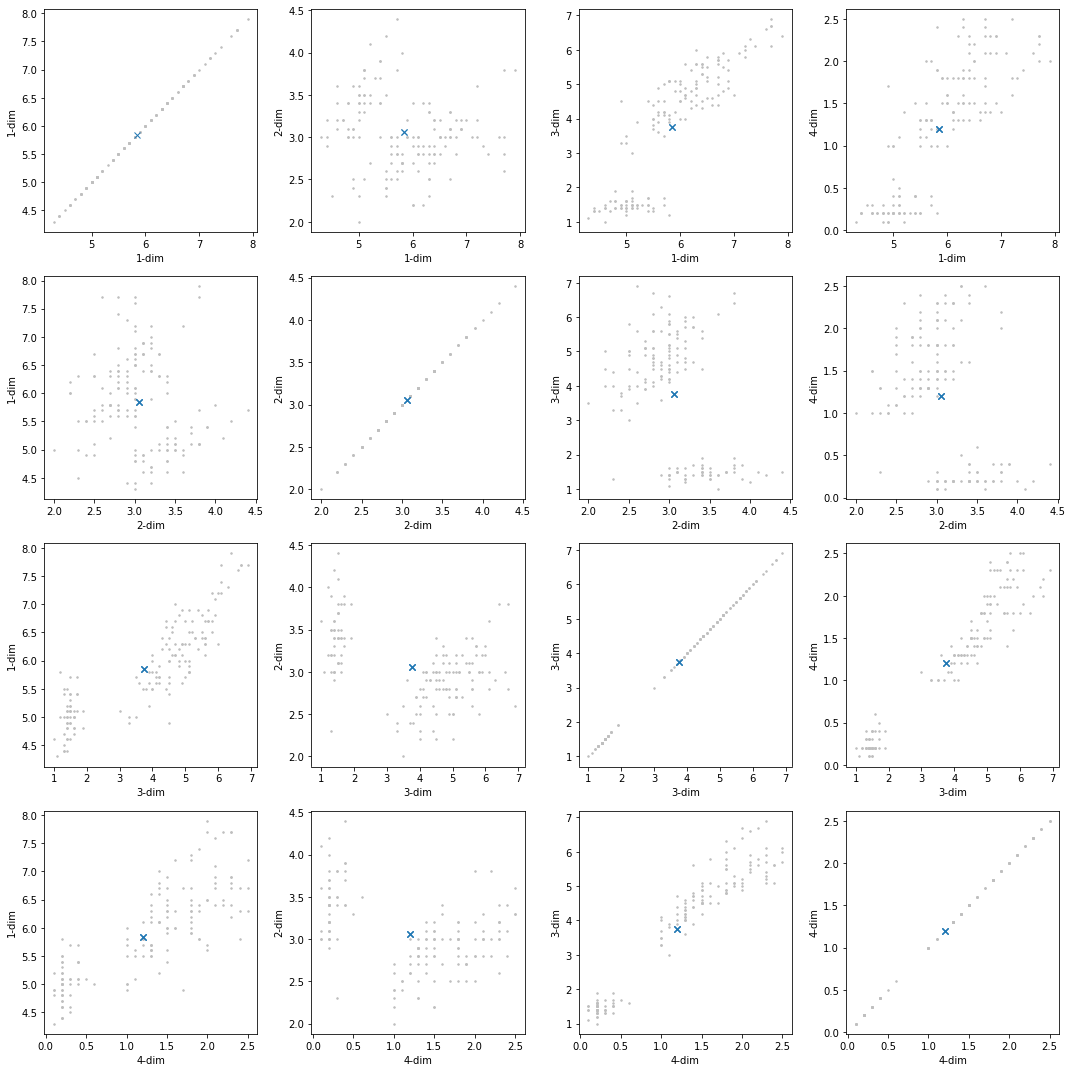

In [63]:
# Figure3 k-means 알고리즘에서 iteration 별 평균 이동 궤적

muTrail = np.empty((D,K,maxIter))
muTrail[:] = np.nan
muTrail[:,:,0] = mu0

mu = 50*(np.random.rand(D,K) - 0.5)
dist2 = np.zeros((N,K)) 

plt.figure(figsize = (15,15))
for i in range(0,D):
    
    for j in range(0,D):
        for k in range(0,K):
            dist2[j, k] = np.sum((x[:,j])-mu[:,k]**2)
        
        c = np.argmin(dist2, axis=1)
        
        plt.subplot(D,D,i*D + j + 1)
        plt.plot(x[i,:],x[j,:],".",markersize = 3,color = [0.75,0.75,0.75]) 
        
#         print(muTrail.shape) # (4, 3, 10)
#         print(x.shape) # (4, 150)

        for k in range(0,K):
            muTrail[:,k,j] = np.mean(x[:,c==k], axis=1)
            plt.plot(muTrail[i,k,:],muTrail[j,k,:],'C%dx--'%k)
            
        plt.xlabel('%d-dim'%(i+1))
        plt.ylabel('%d-dim'%(j+1))
        plt.tight_layout()
        
plt.show()

## [문항2]

__Q. Average-linkage Method를 활용하여 주어진 테이블(행렬)에서 계층 군집을 진행하시오.__

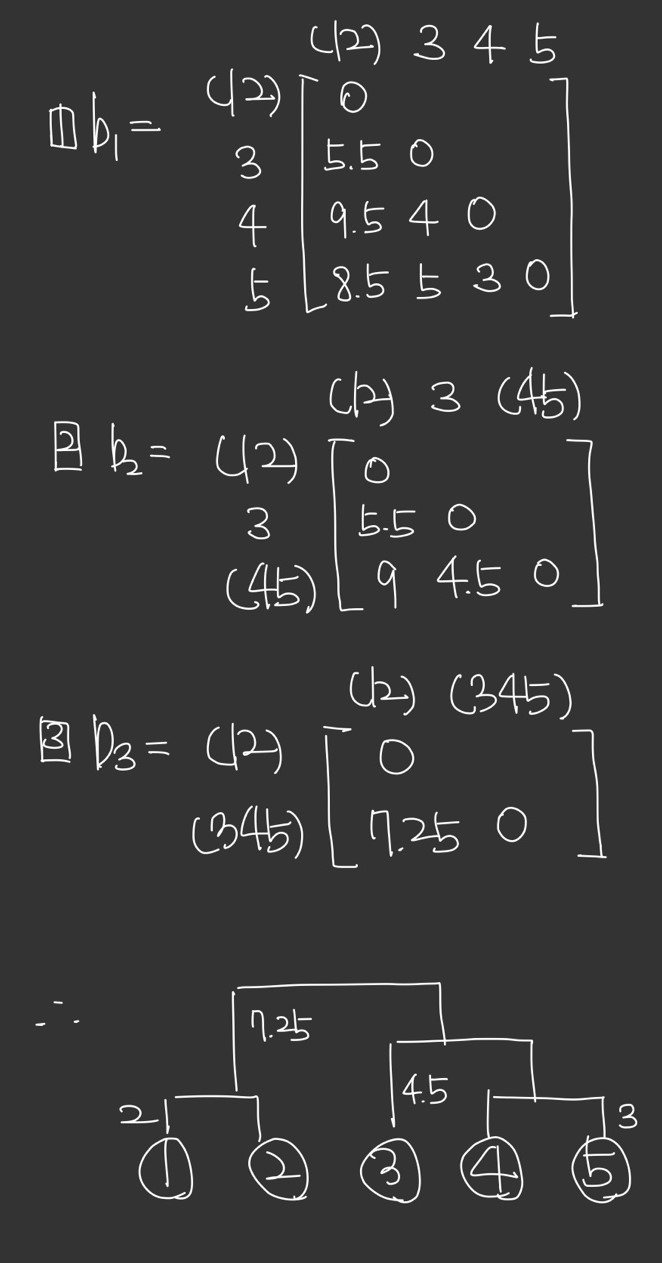

## [문항3]


__Q. 확률밀도함수와 확률의 차이를 누적분포함수, 확률질량함수의 개념을 사용하여 설명하세요.__

* 확률: 입력이 사건, 출력이 확률값인 일종의 함수로 이때 출력값은 0이상 1이하의 값을 가진다. 

* 확률질량함수: 이산형 확률변수(셀 수 있는, 유한 개의 x)의 확률분포를 표현한 함수이다.

* 확률밀도함수: 연속형 확률변수(셀 수 없는, 무한 개의 x)의 확률분포를 표현한 함수이다.

* 누적분포함수: 확률변수가 특정 값 이하일 확률을 나타내는 함수로 이때 확률은 누적되므로 단조증가함수이다.

__A.__ 확률밀도함수의 각 x가 발생할 확률은 0이며 함수값은 단순 가능성 비교의 척도이다.(즉, 확률밀도함수의 함수값이 크면 다른 x값보다 발생 확률이 높을 것이라고 간주) 즉, 확률을 구하기 위해선 하나의 x값이 아닌 구간을 통해 정의해야하며 확률은 함수와 x축으로 둘러싸인 넓이로 구할 수 있다.

##  [문항4]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

### 데이터 스케일링

In [4]:
# 데이터 불러오기
from sklearn.datasets import load_wine
wine = load_wine()
wineDF = pd.DataFrame(wine.data, columns=wine.feature_names)
wineDF['target'] = wine.target
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
# 데이터 스케일링 
from sklearn.preprocessing import StandardScaler
y = wineDF['target']
X = wineDF.drop('target', axis=1)
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.shape

(178, 13)

### feature 3개 선택 후 3차원 시각화

No handles with labels found to put in legend.


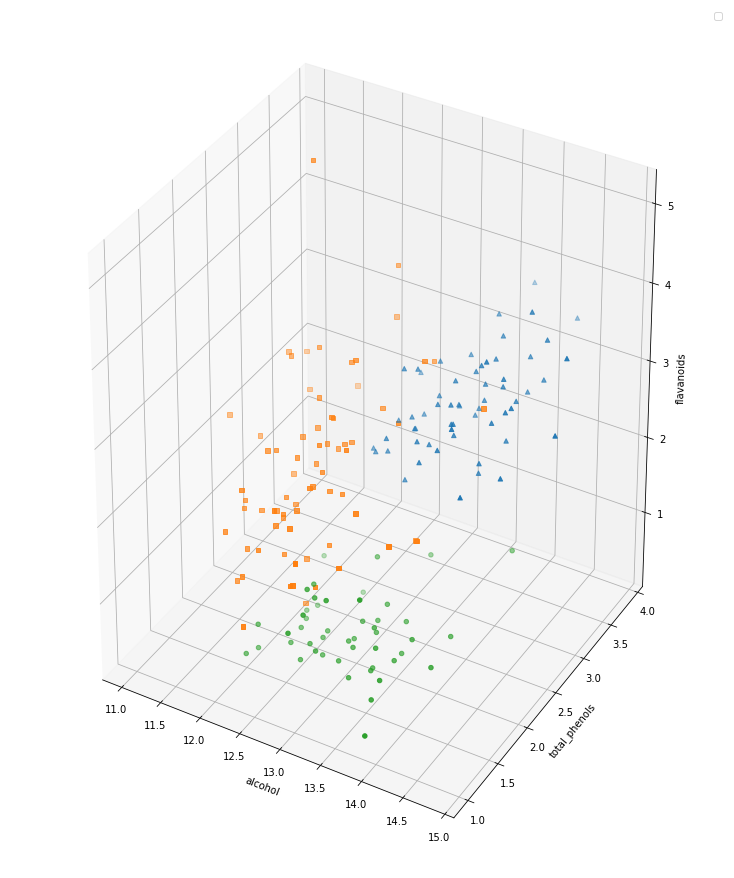

In [6]:
# markers=['^','s','o']
# fig = plt.figure(figsize=(10,12))
# ax = fig.add_subplot(111, projection='3d') -> unknown error

from mpl_toolkits.mplot3d import Axes3D

markers=['^','s','o']
fig = plt.figure(figsize=(10, 12))
ax = Axes3D(fig)

# feature 3개 선택: alcohol, total_phenols, flavanoids
ftr1 = 'alcohol'
ftr2 = 'total_phenols'
ftr3 = 'flavanoids'

for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF['target']==i][ftr1]
    y_axis_data = wineDF[wineDF['target']==i][ftr2]
    z_axis_data = wineDF[wineDF['target']==i][ftr3]
    ax.scatter(x_axis_data, y_axis_data,z_axis_data, marker=marker)

plt.legend()
plt.xlabel(ftr1)
plt.ylabel(ftr2)
ax.set_zlabel(ftr3, fontsize=10, rotation=60)
plt.show()

### k-means, dbscan, mean shift 알고리즘 시각화

In [7]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster[ftr1], y=label_cluster[ftr2], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='best'
    else: legend_loc='best'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [8]:
# k-means, dbscan, mean shift 3차원 시각화

clusterDF = pd.DataFrame(data=X_scaled, columns=[ftr1, ftr2])
clusterDF['target'] = y

# k-means
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

# dbscan
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_scaled)

# mean shift
meanshift = MeanShift(bandwidth=3.9)
meanshift_labels = meanshift.fit_predict(X_scaled)
# print(np.unique(meanshift_labels))

# df_pca 생성
clusterDF['kmeans'] = kmeans_labels
clusterDF['dbscan'] = dbscan_labels
clusterDF['meanshift'] = meanshift_labels

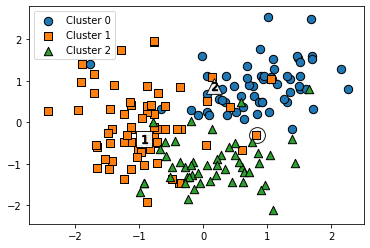

In [9]:
visualize_cluster_plot(kmeans, clusterDF, 'kmeans', iscenter=True)

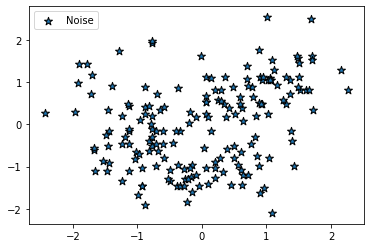

In [10]:
visualize_cluster_plot(dbscan, clusterDF, 'dbscan', iscenter=False)

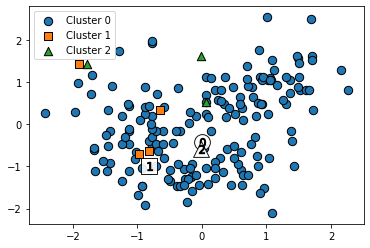

In [11]:
visualize_cluster_plot(meanshift, clusterDF, 'meanshift', iscenter=True)